In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics


# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier




In [2]:
from xgboost import XGBClassifier

In [4]:
survey_train_data=pd.read_csv('/Users/janarthananm/Documents/Projects/Shinkansen/notebook/data/Surveydata_train_(1)_(2).csv')
survey_test_data=pd.read_csv('/Users/janarthananm/Documents/Projects/Shinkansen/notebook/data/Surveydata_test_(2).csv')
travel_train_data=pd.read_csv('/Users/janarthananm/Documents/Projects/Shinkansen/notebook/data/Traveldata_train_(1)_(3).csv')
travel_test_data=pd.read_csv('/Users/janarthananm/Documents/Projects/Shinkansen/notebook/data/Traveldata_test_(2).csv')

In [5]:
survey_train_data.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [6]:
survey_train_data.shape

(94379, 17)

In [7]:
survey_test_data.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [8]:
survey_test_data.shape

(35602, 16)

In [9]:
merged_train_df = pd.merge(survey_train_data, travel_train_data, on= 'ID')

In [10]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

In [11]:
merged_train_df.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

In [12]:
cols = merged_train_df.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(merged_train_df[i].value_counts())
    print("*" * 30)

Seat_comfort
acceptable          21158
need improvement    20946
good                20595
poor                15185
excellent           12971
extremely poor       3463
Name: count, dtype: int64
******************************
Seat_Class
Green Car    47435
Ordinary     46944
Name: count, dtype: int64
******************************
Arrival_time_convenient
good                19574
excellent           17684
acceptable          15177
need improvement    14990
poor                13692
extremely poor       4332
Name: count, dtype: int64
******************************
Catering
acceptable          18468
need improvement    17978
good                17969
poor                13858
excellent           13455
extremely poor       3910
Name: count, dtype: int64
******************************
Platform_location
manageable           24173
Convinient           21912
need improvement     17832
Inconvinient         16449
very convinient      13981
very inconvinient        2
Name: count, dtype: int64
***

In [13]:
merged_train_df.describe()

,ID,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,94379.000,94379.000,94346.000,94379.000,94322.000,94022.000
mean,98847190.000,0.547,39.420,1978.888,14.647,15.005
std,27245.015,0.498,15.117,1027.961,38.139,38.439
min,98800001.000,0.000,7.000,50.000,0.000,0.000
25%,98823595.500,0.000,27.000,1359.000,0.000,0.000
50%,98847190.000,1.000,40.000,1923.000,0.000,0.000
75%,98870784.500,1.000,51.000,2538.000,12.000,13.000
max,98894379.000,1.000,85.000,6951.000,1592.000,1584.000


In [14]:
merged_test_df = pd.merge(survey_test_data, travel_test_data, on= 'ID')

In [15]:
merged_test_df.describe()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,35602.000,35591.000,35602.000,35573.000,35479.000
mean,99917801.500,39.447,1987.152,14.881,15.309
std,10277.556,15.138,1024.309,37.895,38.531
min,99900001.000,7.000,50.000,0.000,0.000
25%,99908901.250,27.000,1360.000,0.000,0.000
50%,99917801.500,40.000,1929.000,0.000,0.000
75%,99926701.750,51.000,2559.000,13.000,13.000
max,99935602.000,85.000,6868.000,978.000,970.000


In [16]:
categorical_columns = ['Seat_comfort', 'Arrival_time_convenient', 'Catering', 
                       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment', 
                       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 
                       'Leg_room', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 
                       'Online_boarding', 'Gender', 'CustomerType', 'TypeTravel', 
                       'Travel_Class']

for col in categorical_columns:
    mode_value = merged_train_df[col].mode()[0]
    merged_train_df[col].fillna(mode_value, inplace=True)
    merged_test_df[col].fillna(mode_value, inplace=True)

In [17]:
numerical_columns = ['Age', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']


for col in numerical_columns:
    mean_value = round(merged_train_df[col].mean()) 
    merged_train_df[col].fillna(mean_value, inplace=True)
    merged_test_df[col].fillna(mean_value, inplace=True)

In [18]:
def labeled_barplot(merged_train_df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(merged_train_df[feature])  # length of the column
    count = merged_train_df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=merged_train_df,
        x=feature,
        palette="Paired",
        order=merged_train_df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

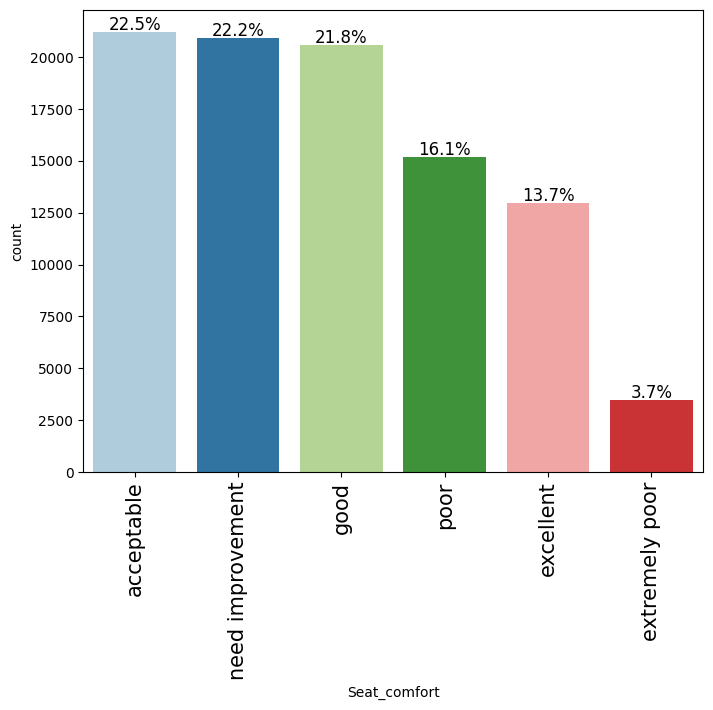

In [19]:
labeled_barplot(merged_train_df,'Seat_comfort',perc=True)

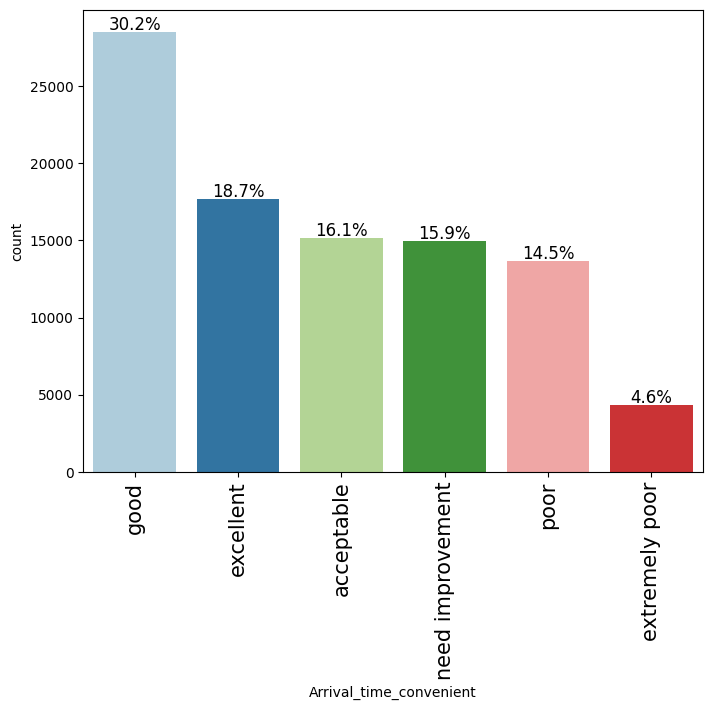

In [49]:
labeled_barplot(merged_train_df,'Arrival_time_convenient',perc=True)

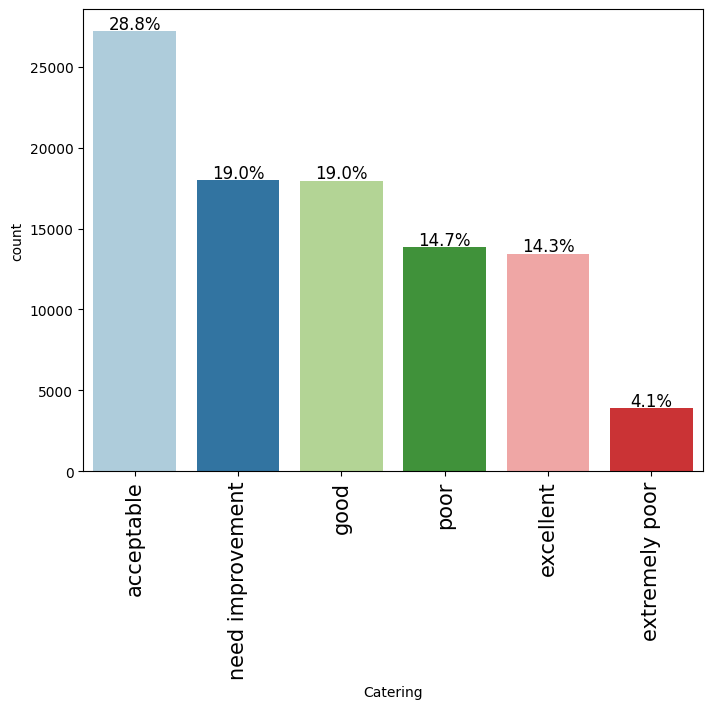

In [50]:
labeled_barplot(merged_train_df,'Catering',perc=True)

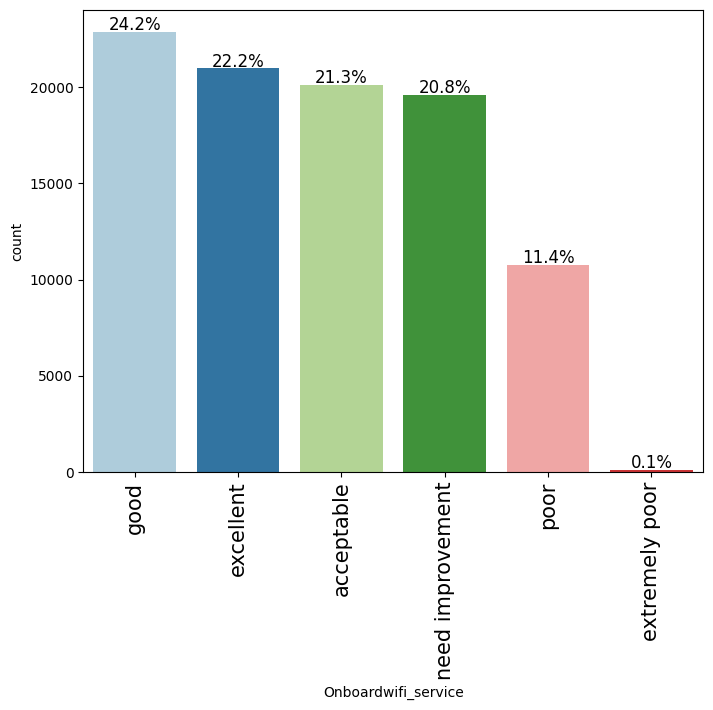

In [51]:
labeled_barplot(merged_train_df,'Onboardwifi_service',perc=True)

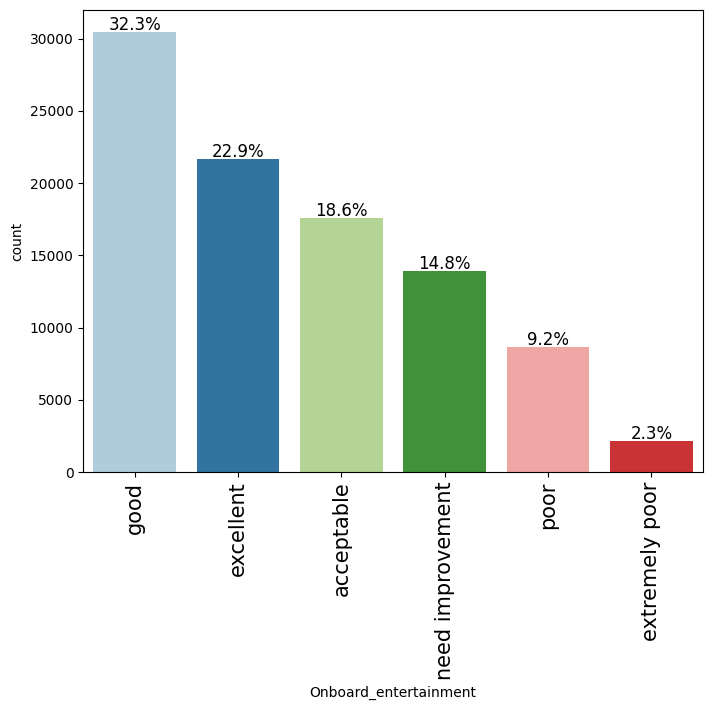

In [52]:
labeled_barplot(merged_train_df,'Onboard_entertainment',perc=True)

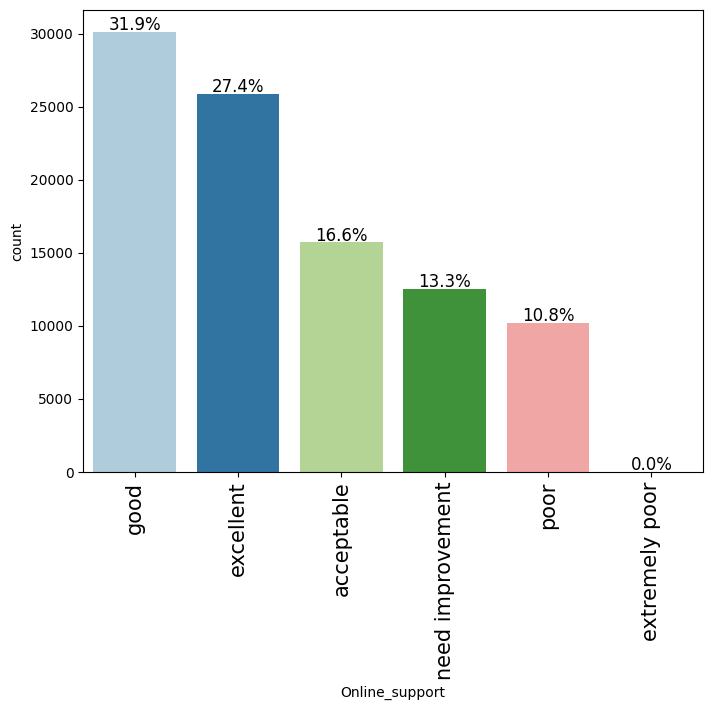

In [25]:
labeled_barplot(merged_train_df,'Online_support',perc=True)

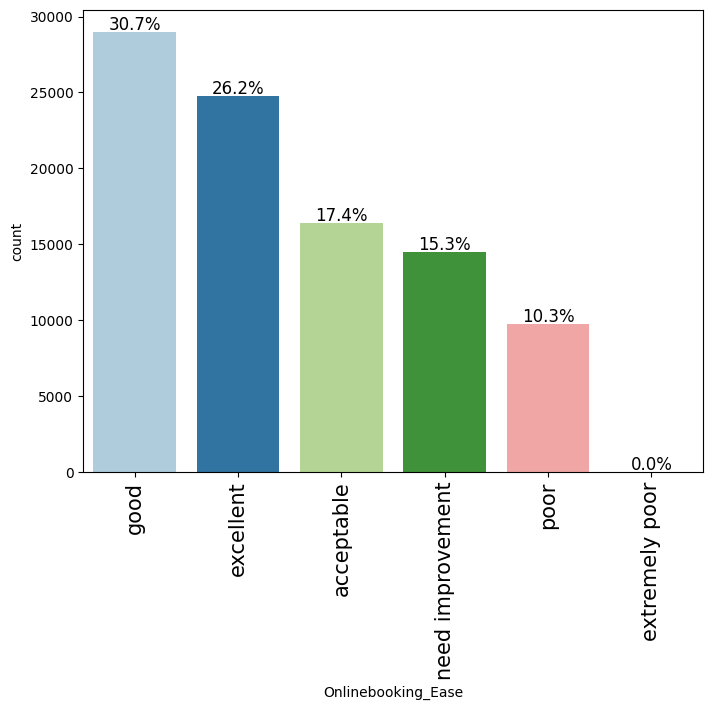

In [26]:
labeled_barplot(merged_train_df,'Onlinebooking_Ease',perc=True)

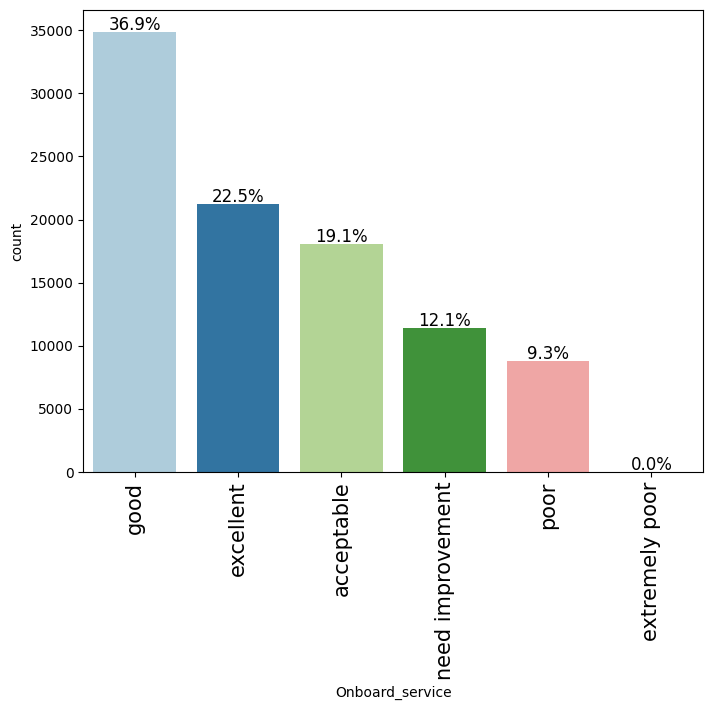

In [27]:
labeled_barplot(merged_train_df,'Onboard_service',perc=True)

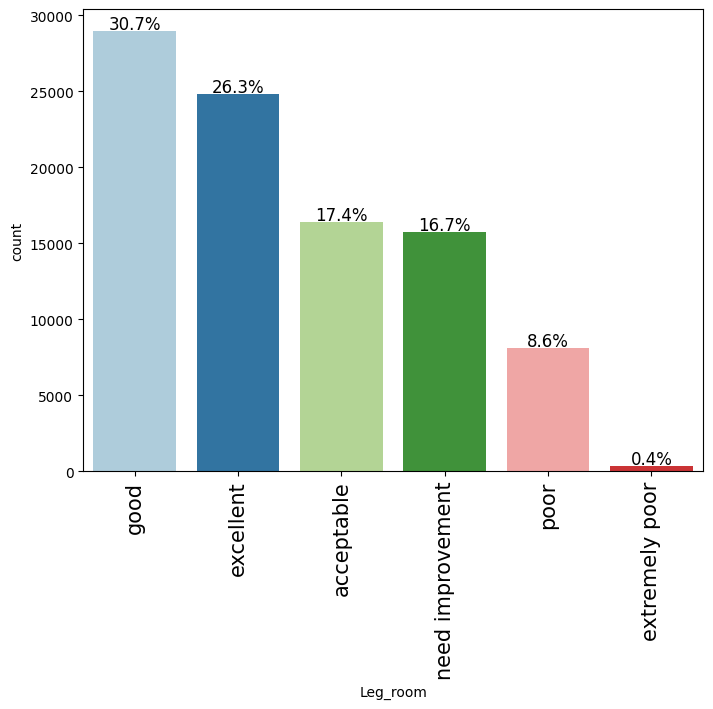

In [28]:
labeled_barplot(merged_train_df,'Leg_room',perc=True)

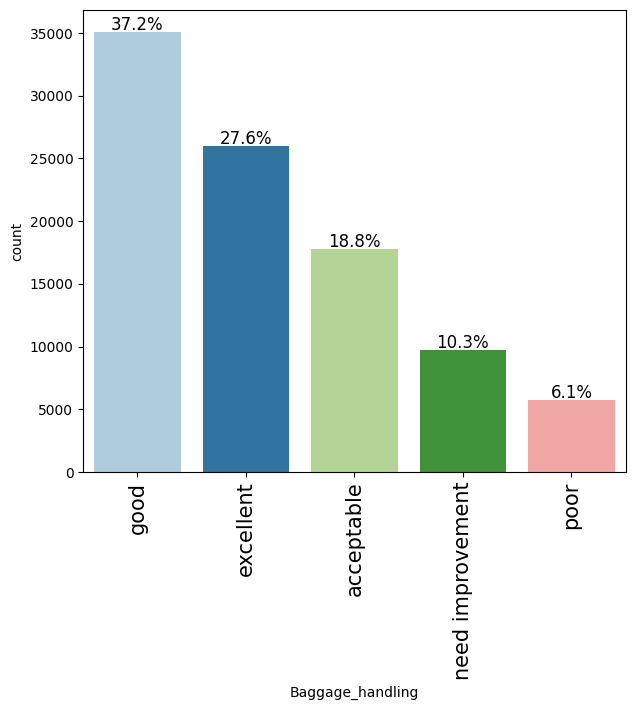

In [29]:
labeled_barplot(merged_train_df,'Baggage_handling',perc=True)

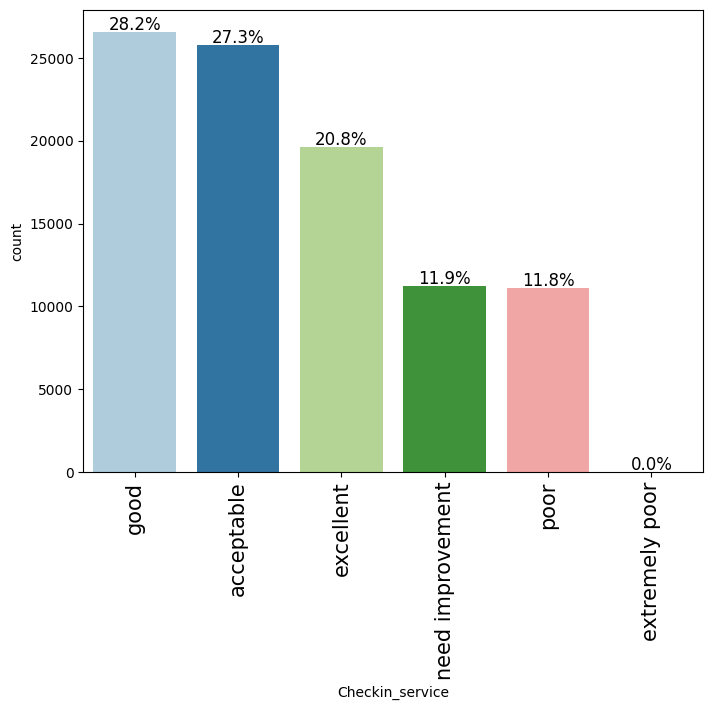

In [30]:
labeled_barplot(merged_train_df,'Checkin_service',perc=True)

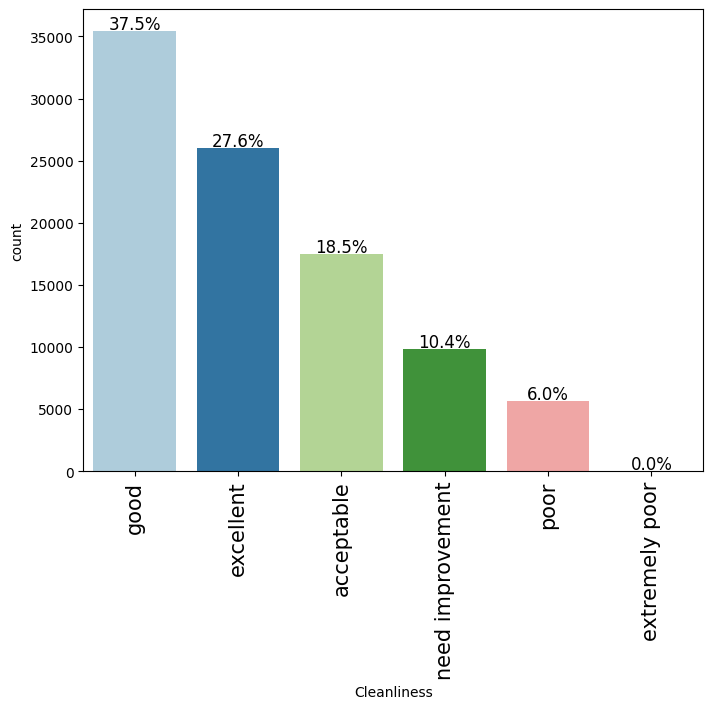

In [31]:
labeled_barplot(merged_train_df,'Cleanliness',perc=True)

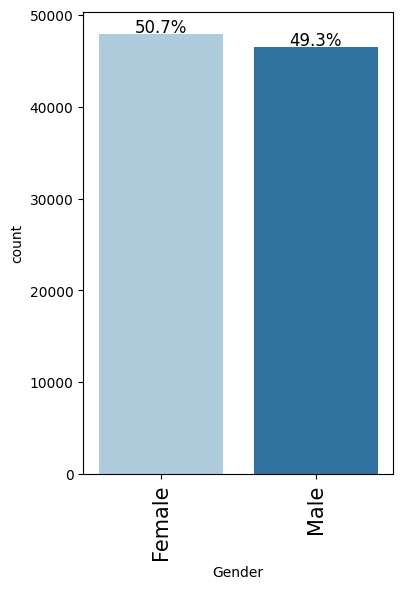

In [32]:
labeled_barplot(merged_train_df,'Gender',perc=True)

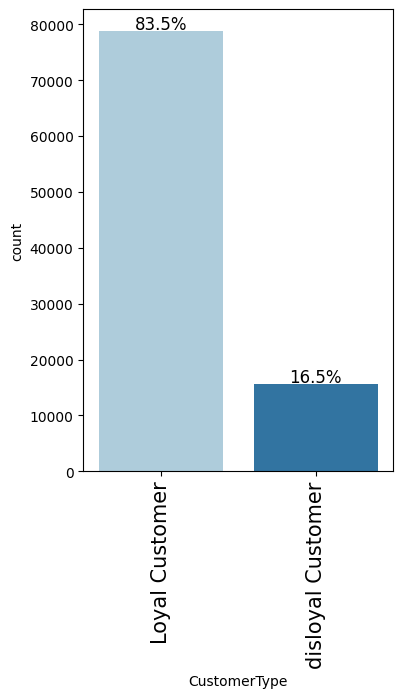

In [33]:
labeled_barplot(merged_train_df,'CustomerType',perc=True)

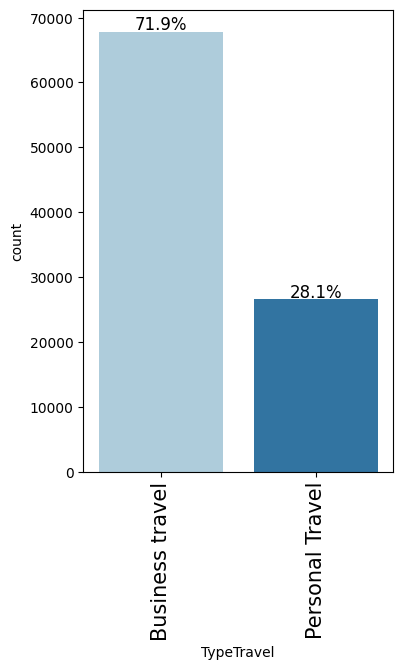

In [34]:
labeled_barplot(merged_train_df,'TypeTravel',perc=True)

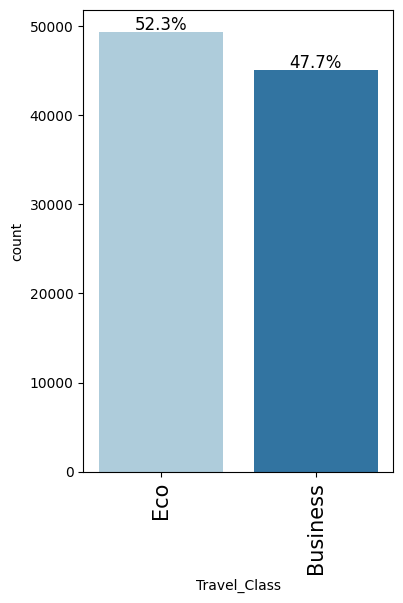

In [35]:
labeled_barplot(merged_train_df,'Travel_Class',perc=True)

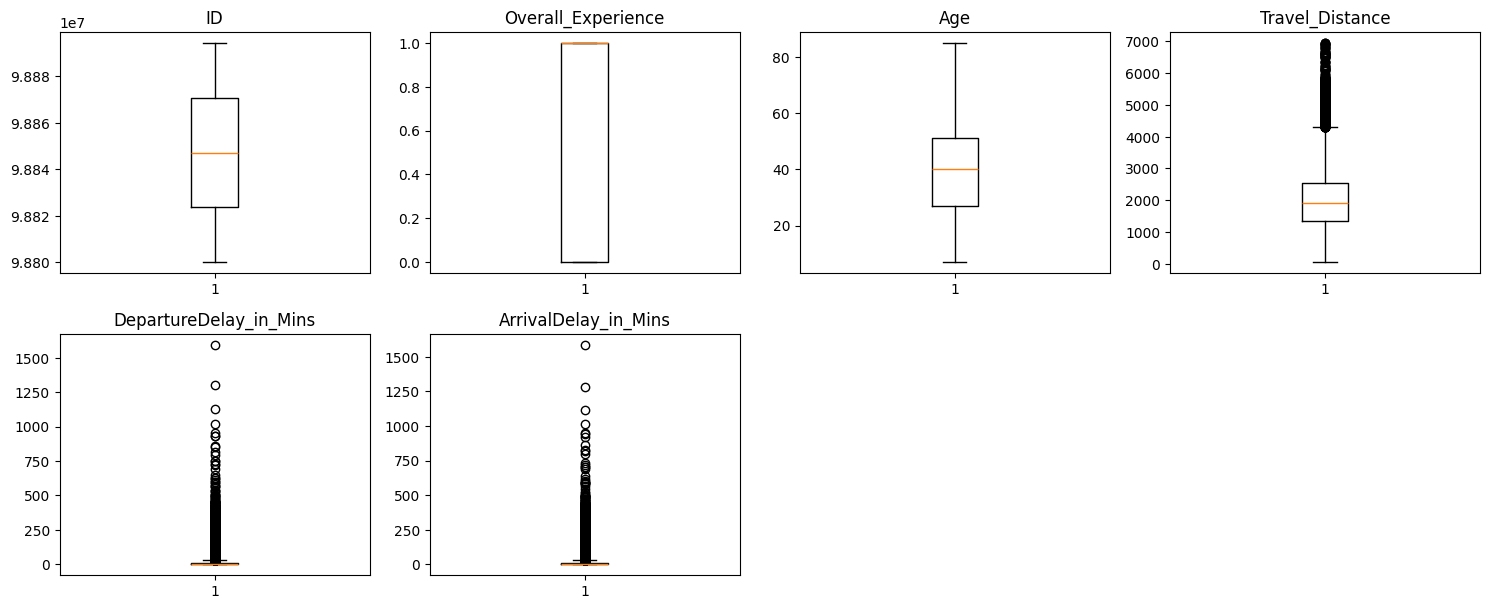

In [53]:
numeric_columns = merged_train_df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(merged_train_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

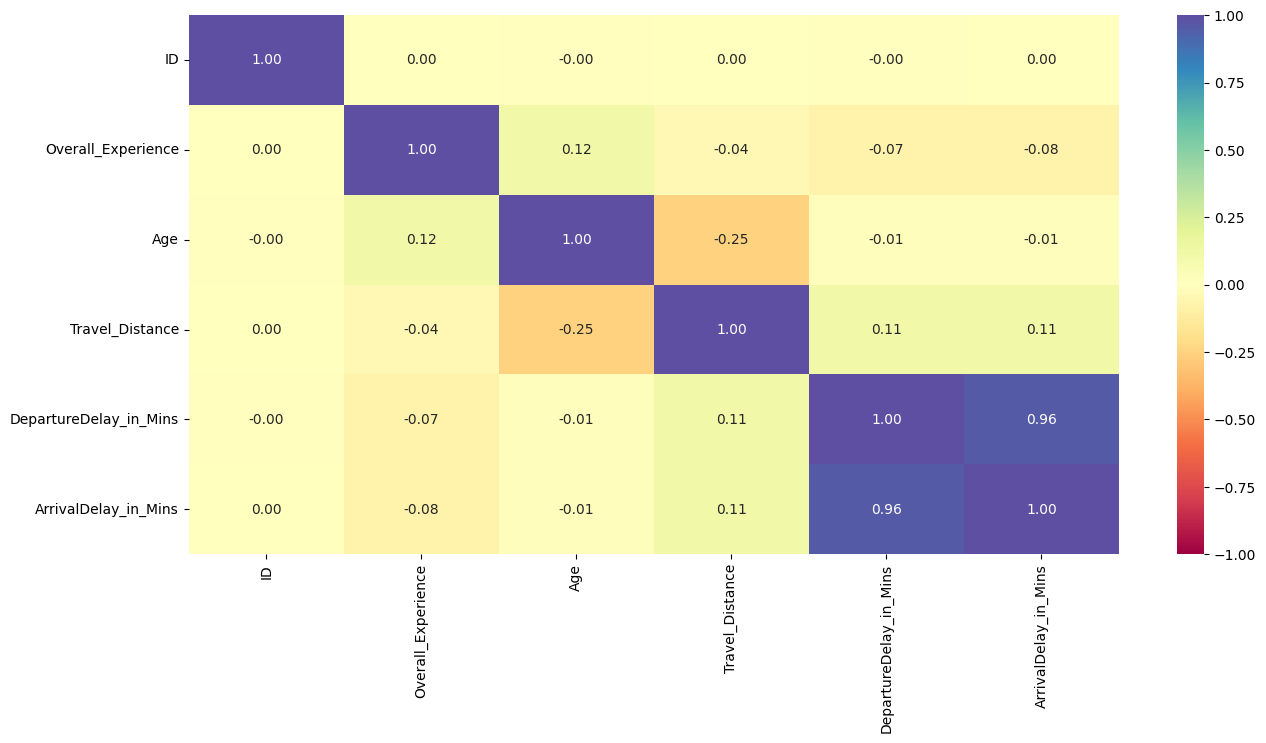

In [54]:
plt.figure(figsize=(15, 7))
sns.heatmap(merged_train_df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

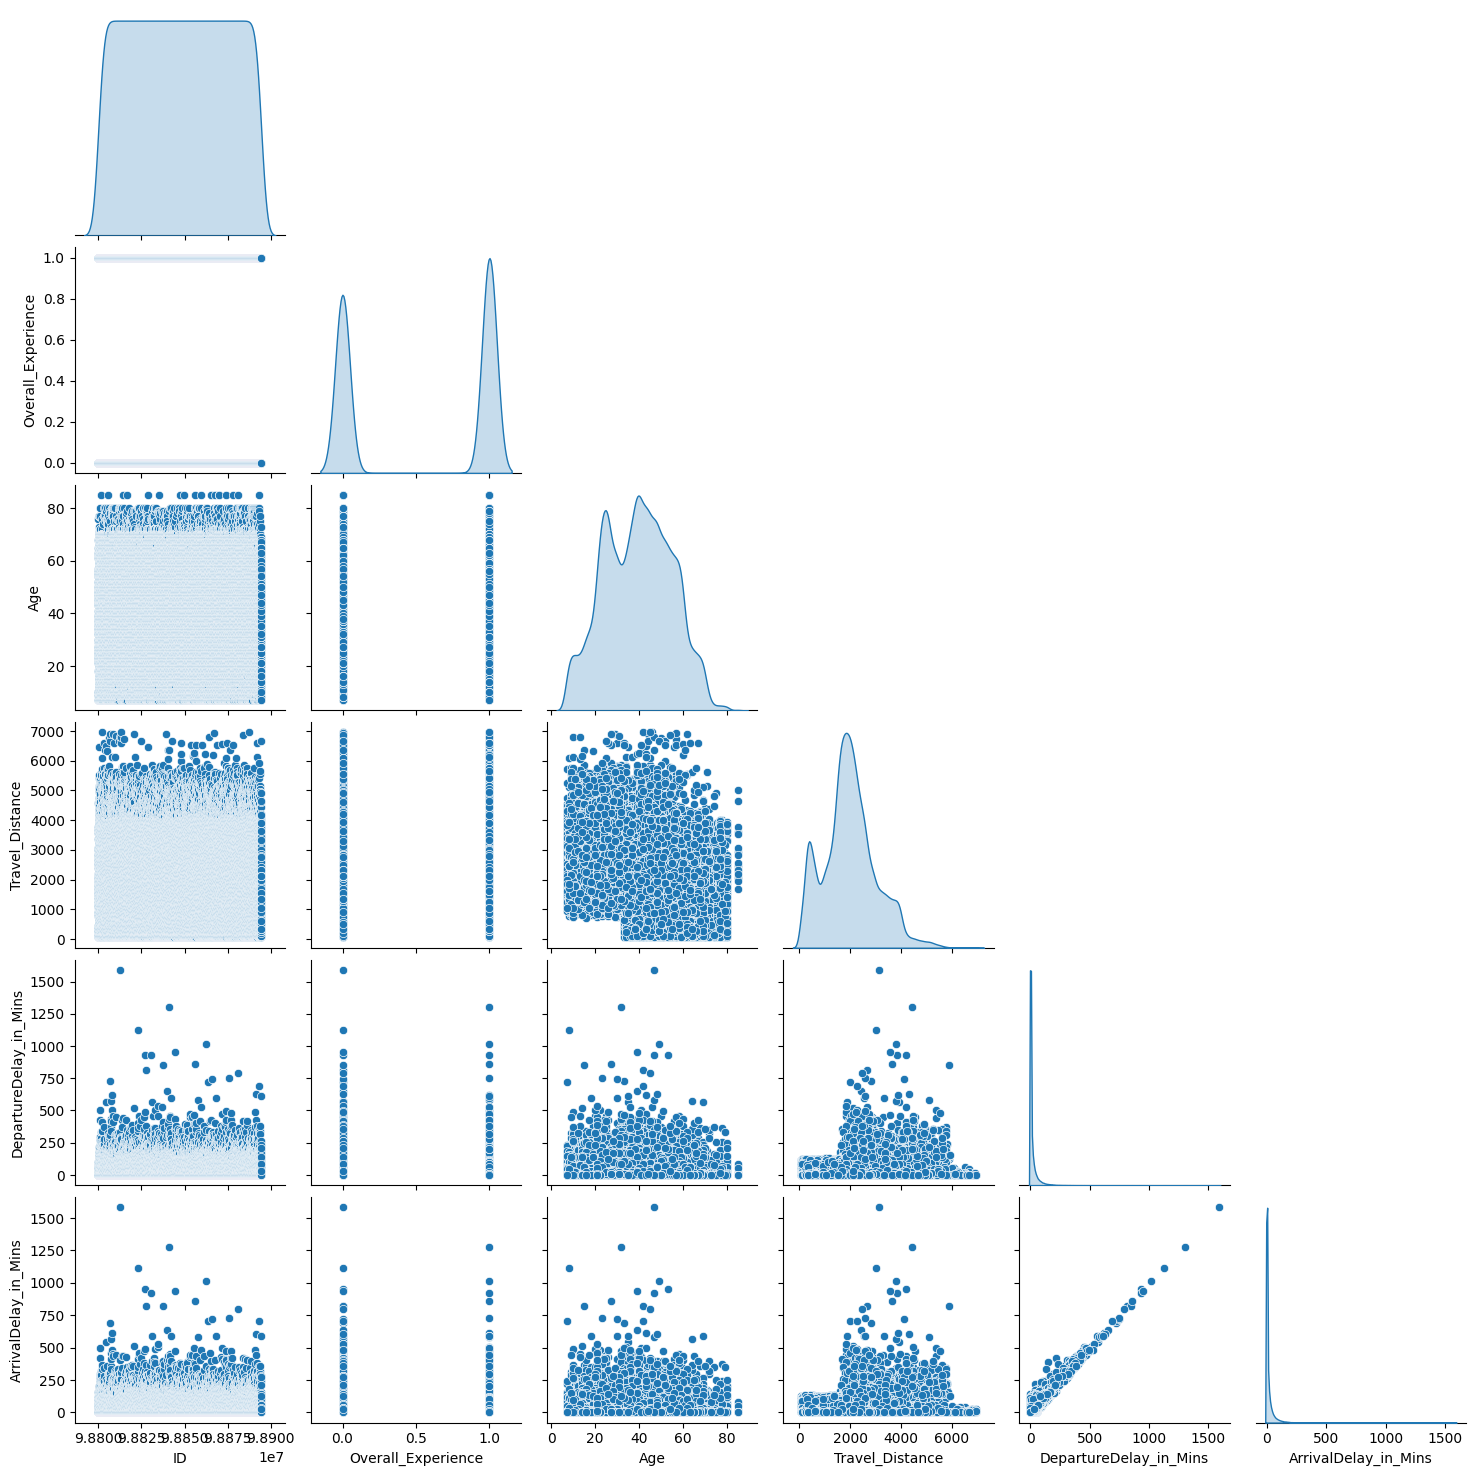

In [33]:
sns.pairplot(
    merged_train_df[numeric_columns],  # select numeric columns only
    diag_kind="kde",
    palette="Spectral",
    corner=True
)
plt.show()

# Insights and Recommendations from EDA

# Insights:

1.Only 3.7% of passengers has raised a concern with seat comfort as extermely poor.  
2.Approxiametly 34% of passengers has raised a concern with arrival time convienent.  
3.Approxiamtely 15% of the passengers has rasied a concern by with need for improvement in catering and 4% of the passengers has rasied extermely poor catering.  
4.Approxiametely 30% of passengers have raised a concern with onboard wifi_service.  
5.Travel_distance is Strongly right skewed, with many outliers beyond ~5000 units.Median around 2000, wide interquartile range.  
6.DepartureDelay_in_Mins is heavily right-skewed with many extreme outliers (some >1500 mins).Most values are near zero.  
ArrivalDelay_in_Mins with similar pattern to DepartureDelay_in_Mins: right-skewed with extreme outliers.Strong presence of near-zero delay values.  

# Recommendations:
1.Maintaining current seat standards—not an urgent area of improvement.  
2.Restructure arrival schedules or offer multiple arrival slot options where possible.Analyzing which specific routes/times have low convenience ratings to target optimizations.  
3.Focus initially on routes/segments with worst catering feedback.  
4.Segment long-distance travelers and offer special perks (free upgrades, extra legroom).Consider marketing loyalty benefits or stopover options for ultra-long routes.  
5.Offer real-time delay notifications, compensation points.  

In [20]:
median_age = round(merged_train_df['Age'].median())
age_5th_percentile = round(merged_train_df['Age'].quantile(0.05))


merged_train_df['Age'] = merged_train_df['Age'].apply(lambda x: median_age if x >= 85 else (age_5th_percentile if x <= 17 else x)).round().astype(int)
merged_test_df['Age'] = merged_test_df['Age'].apply(lambda x: median_age if x >= 85 else (age_5th_percentile if x <= 17 else x)).round().astype(int)


In [21]:
merged_train_df['DepartureDelay_in_Mins'] = merged_train_df['DepartureDelay_in_Mins'].astype(int)
merged_train_df['ArrivalDelay_in_Mins'] = merged_train_df['ArrivalDelay_in_Mins'].astype(int)

merged_test_df['DepartureDelay_in_Mins'] = merged_test_df['DepartureDelay_in_Mins'].astype(int)
merged_test_df['ArrivalDelay_in_Mins'] = merged_test_df['ArrivalDelay_in_Mins'].astype(int)

In [22]:
merged_train_df = merged_train_df.drop(['ID', 'ArrivalDelay_in_Mins'], axis=1)
df_test = merged_test_df['ID']
merged_test_df = merged_test_df.drop(['ID', 'ArrivalDelay_in_Mins'], axis=1)


In [23]:
travel_90th_percentile = round(merged_train_df['Travel_Distance'].quantile(0.90))
departuredelay_99th_percentile = round(merged_train_df['DepartureDelay_in_Mins'].quantile(0.99))

# Define a function to cap values at a given percentile
def cap_at_percentile(data, column, cap_value):
    data[column] = data[column].apply(lambda x: min(x, cap_value))
    return data

# Apply 90th percentile capping for Travel_Distance in both train and test datasets
merged_train_df = cap_at_percentile(merged_train_df, 'Travel_Distance', travel_90th_percentile)
merged_test_df = cap_at_percentile(merged_test_df, 'Travel_Distance', travel_90th_percentile)

# Apply 99th percentile capping for DepartureDelay_in_Mins in both train and test datasets
merged_train_df = cap_at_percentile(merged_train_df, 'DepartureDelay_in_Mins', departuredelay_99th_percentile)
merged_test_df = cap_at_percentile(merged_test_df, 'DepartureDelay_in_Mins', departuredelay_99th_percentile)

In [24]:
merged_train_df.shape

(94379, 23)

In [25]:
category_mapping = {
    "extremely poor": 0,
    "poor": 1,
    "need improvement": 2,
    "acceptable": 3,
    "good": 4,
    "excellent": 5,
    "Ordinary": 0,
    "Green Car": 1,
    "very inconvinient": 0,
    "Inconvinient": 1,
    "need improvement": 2,
    "manageable": 3,
    "Convinient": 4,
    "very convinient": 5
}

# List of columns for label encoding (ordinal columns)
label_columns = [
    "Seat_comfort", "Onboardwifi_service", "On_board service", "Seat_Class", "Arrival_time_convenient",
    "Onboard_entertainment", "Leg_room", "Cleanliness", "Catering", "Online_support",
    "Baggage_handling", "Online_boarding", "Onlinebooking_Ease", "Onboard_service",
    "Platform_location","Checkin_service"
]

# Apply label encoding to the specified columns in both train and test sets
for col in label_columns:
    if col in merged_train_df.columns:
        merged_train_df[col] = merged_train_df[col].map(category_mapping)
    if col in merged_test_df.columns:
        merged_test_df[col] = merged_test_df[col].map(category_mapping)

In [26]:
X = merged_train_df.drop(['Overall_Experience'], axis=1)
y = merged_train_df['Overall_Experience']

# Adding a constant to the independent variables for logistic regression
X = sm.add_constant(X)

# Creating dummy variables for training data
X = pd.get_dummies(X, columns=["Gender", "CustomerType", "TypeTravel", "Travel_Class"], drop_first=True)

# Converting values to float for training data
X = X.astype(float)

# Step 2: Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Step 3: Prepare the features for test data
X_test = merged_test_df
X_test = sm.add_constant(X_test)

# Creating dummy variables for test data
X_test = pd.get_dummies(X_test, columns=["Gender", "CustomerType", "TypeTravel", "Travel_Class"], drop_first=True)

# Converting values to float for test data
X_test = X_test.astype(float)

# Step 4: Ensure the train and test data have the same columns (align them)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [28]:
X1_train = merged_train_df.drop(['Overall_Experience'], axis=1)
y1_train = merged_train_df['Overall_Experience']


# Creating dummy variables for training data
X1_train = pd.get_dummies(X1_train, columns=["Gender", "CustomerType", "TypeTravel", "Travel_Class"], drop_first=True)

# Converting values to float for training data
X1_train = X_train.astype(float)

# Step 2: Split the training data into train and validation sets
X1_train, X1_val, y1_train, y1_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# For test data (merged_test_df)
X1_test = merged_test_df

# Creating dummy variables for test data
X1_test = pd.get_dummies(X1_test, columns=["Gender", "CustomerType", "TypeTravel", "Travel_Class"], drop_first=True)

# Converting values to float for test data
X1_test = X1_test.astype(float)


# Align the columns to ensure both have the same structure
X1_train, X1_test = X1_train.align(X1_test, join='left', axis=1)

In [29]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [30]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [31]:
models = []  


models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGB",XGBClassifier(random_state=1, verbosity = 0)))
models.append(("CatBoost", CatBoostClassifier(random_state=1, silent=True)))

print("\nTraining Performance(Accuracy score):\n")
for name, model in models:
    model.fit(X1_train, y1_train)
    scores = accuracy_score(y1_train, model.predict(X1_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance(Accuracy score):\n")
for name, model in models:
    model.fit(X1_train, y1_train)
    scores_val =  accuracy_score(y1_val, model.predict(X1_val))
    print("{}: {}".format(name, scores_val))


Training Performance(Accuracy score):

Random forest: 1.0
GBM: 0.9205991814894773
Adaboost: 0.8795014767625128
dtree: 1.0
XGB: 0.9709150629776301
CatBoost: 0.9705839503066104

Validation Performance(Accuracy score):

Random forest: 0.9508370417461327
GBM: 0.9171964399237127
Adaboost: 0.8774634456452638
dtree: 0.9280567916931554
XGB: 0.9525323161686798
CatBoost: 0.9532210214028396


In [32]:
Model = XGBClassifier(random_state=1)

# Grid of parameters to choose from
model = {'n_estimators': [75, 100, 125, 150],
         'subsample': [0.7, 0.8, 0.9, 1],
         'gamma': [0, 1, 3, 5],
         'colsample_bytree': [0.7, 0.8, 0.9, 1],
         'colsample_bylevel': [0.7, 0.8, 0.9, 1],
         'learning_rate': [0.1, 0.01, 0.2, 0.05, 1]
         }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=model, n_iter=100, scoring=scorer, cv=10, random_state=1, n_jobs=-1)
randomized_cv.fit(X1_train, y1_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 150, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7} with CV score=0.9530085748039161:


In [33]:
tuned_xgb = XGBClassifier(
    subsample=0.7,
    random_state=1,
    n_estimators=150,
    gamma=0,
    colsample_bytree=0.8,
    colsample_bylevel=1,
    learning_rate= 0.2,
    reg_lambda=1,
    reg_alpha=0,
)
tuned_xgb.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
tuned_xgb_train = model_performance_classification_sklearn(tuned_xgb, X1_train, y1_train)
tuned_xgb_train

,Accuracy,Recall,Precision,F1
0,0.972,0.969,0.979,0.974


In [35]:
tuned_xgb_val = model_performance_classification_sklearn(tuned_xgb, X1_val, y1_val)
tuned_xgb_val

,Accuracy,Recall,Precision,F1
0,0.952,0.952,0.961,0.956


In [36]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X1_train, y1_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': np.int64(100), 'max_features': 0.7, 'learning_rate': 1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9387044198204496:
CPU times: user 5.23 s, sys: 788 ms, total: 6.01 s
Wall time: 2min 26s


In [37]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X1_train, y1_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=0.7, random_state=1,
                           subsample=0.5)

In [38]:
tuned_gbm_train = model_performance_classification_sklearn(tuned_gbm, X1_train, y1_train)
tuned_gbm_train

,Accuracy,Recall,Precision,F1
0,0.945,0.946,0.953,0.950


In [39]:
tuned_gbm_val = model_performance_classification_sklearn(tuned_gbm, X1_val, y1_val)
tuned_gbm_val

,Accuracy,Recall,Precision,F1
0,0.936,0.939,0.944,0.942


In [40]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X1_train, y1_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(30), 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9156060003920621:
CPU times: user 2.71 s, sys: 548 ms, total: 3.26 s
Wall time: 39 s


In [42]:
Model = CatBoostClassifier(random_state=1, silent=True)

# Parameter grid for CatBoostClassifier in RandomizedSearchCV
param_grid = {
    "iterations": np.arange(50, 300, 50),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "depth": [4, 6, 8, 10],  # Similar to max_depth in other boosting methods
    "l2_leaf_reg": [1, 3, 5, 7, 9],  # Regularization
    "random_strength": [1, 2, 5],    # Random strength for score calculation
    "bagging_temperature": [0, 0.5, 1],  # Sampling rate control
}
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model, 
    param_distributions=param_grid, 
    n_jobs=-1, 
    n_iter=50, 
    scoring=scorer, 
    cv=5, 
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X1_train, y1_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'random_strength': 1, 'learning_rate': 0.2, 'l2_leaf_reg': 3, 'iterations': np.int64(150), 'depth': 8, 'bagging_temperature': 0} with CV score=0.9549819287438094:


In [43]:
tuned_cat = CatBoostClassifier(
    random_strength=1,
    learning_rate=0.2,
    l2_leaf_reg=3,
    iterations=150,
    depth=8,
    bagging_temperature=0,
)
tuned_cat.fit(X1_train, y1_train)

0:	learn: 0.4561994	total: 13.6ms	remaining: 2.03s
1:	learn: 0.3626472	total: 22.2ms	remaining: 1.65s
2:	learn: 0.3122913	total: 31ms	remaining: 1.52s
3:	learn: 0.2709441	total: 39.9ms	remaining: 1.46s
4:	learn: 0.2484777	total: 47.5ms	remaining: 1.38s
5:	learn: 0.2250189	total: 55.1ms	remaining: 1.32s
6:	learn: 0.2134665	total: 62ms	remaining: 1.27s
7:	learn: 0.2015654	total: 69.5ms	remaining: 1.23s
8:	learn: 0.1936573	total: 77.5ms	remaining: 1.21s
9:	learn: 0.1876372	total: 84.8ms	remaining: 1.19s
10:	learn: 0.1826083	total: 92.1ms	remaining: 1.16s
11:	learn: 0.1729232	total: 99.5ms	remaining: 1.14s
12:	learn: 0.1669193	total: 107ms	remaining: 1.13s
13:	learn: 0.1624342	total: 115ms	remaining: 1.12s
14:	learn: 0.1592082	total: 123ms	remaining: 1.11s
15:	learn: 0.1539632	total: 130ms	remaining: 1.09s
16:	learn: 0.1515320	total: 137ms	remaining: 1.07s
17:	learn: 0.1488324	total: 145ms	remaining: 1.06s
18:	learn: 0.1459525	total: 153ms	remaining: 1.05s
19:	learn: 0.1427775	total: 160ms

In [44]:
tuned_cat_train = model_performance_classification_sklearn(tuned_cat, X1_train, y1_train)
tuned_cat_train

,Accuracy,Recall,Precision,F1
0,0.973,0.970,0.980,0.975


In [45]:
tuned_cat_val = model_performance_classification_sklearn(tuned_cat, X1_val, y1_val)
tuned_cat_val

,Accuracy,Recall,Precision,F1
0,0.954,0.955,0.960,0.958


In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
catboost_model = CatBoostClassifier(random_state=1, verbose=0)
xgb_model = XGBClassifier(random_state=1, verbosity=0)
meta_model = LogisticRegression()

# Create a stacking classifier
stacking_model = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgb', xgb_model)
    ],
    final_estimator=meta_model
)

# Fit stacking model
stacking_model.fit(X1_train, y1_train)

# Evaluate on train data
train_score = accuracy_score(y1_train, stacking_model.predict(X1_train))
print(f"Stacking Model Training Accuracy: {train_score}")

# Evaluate on validation data
val_score = accuracy_score(y1_val, stacking_model.predict(X1_val))
print(f"Stacking Model Validation Accuracy: {val_score}")

Stacking Model Training Accuracy: 0.9712594201554905
Stacking Model Validation Accuracy: 0.9542805679169315
